# Lista 8 (10 pkt.)

In [57]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

## Zadanie 1 (2 pkt.)

Napisz funkcję $gen(a,b,p)$, która generuje listę punktów reprezentujących krzywą eliptyczną nad $\mathbb{Z}_p$ o równaniu $y^2=(x^3+ax+b)\mod p$.

In [3]:
def gen(a,b,p):
    xs = range(p)
    quad_xs = [(x*x)%p for x in range(p)]
    eliptic_xs = [((x**3)+a*x+b)%p for x in range(p)]
    points=[]
    for i in range(p):
        quad_y = eliptic_xs[i]
        for j in range(p):
            if quad_xs[j] == quad_y :
                points.append([i,j])
    return points

In [4]:
print(gen(-1,0,7)==[[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]])
print(gen(-1,0,11)==[[0, 0], [1, 0], [4, 4], [4, 7], [6, 1], [6, 10], [8, 3], [8, 8], [9, 4], [9, 7], [10, 0]])
print(gen(-1,1,7)==[[0, 1], [0, 6], [1, 1], [1, 6], [2, 0], [3, 2], [3, 5], [5, 3], [5, 4], [6, 1], [6, 6]])
print(gen(0,2,5)==[[2, 0], [3, 2], [3, 3], [4, 1], [4, 4]])

True
True
True
True


## Zadanie 2 (2 pkt.)

Napisz funkcję $add(P,Q,a,p)$, która dodaje do siebie punkty $P$ i $Q$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$. Wykorzystaj wzory z wykładu.

Uwaga 1: wszystkie operacje w tych wzorach są na ciele $\mathbb{Z}_p$ zatem tam gdzie mamy dzielenie mamy tak naprawdę mnożenie przez odwrotność w tym ciele, wykorzystaj tutaj funkcję $inv$ z poprzedniej listy, może być potrzeba ją nieco zmodyfikować, ponieważ może się tu pojawić dzielenie przez zero, które daje nam punkt "w nieskończości" (na wykładzie: $\mathcal{O}$).

Uwaga 2: Uwzględnij również, że zarówno w wyniku dodawania jak i w argumentach dodawanie może pojawić się punkt "w nieskończoności", zwracaj go jako $nan$, tj. za pomocą $float('nan')$, do sprawdzania czy coś jest $nan$ użyj $np.isnan()$.

In [5]:
def inv(p,n):
    s=0
    t=1
    old_s=1
    old_t=0
    while(n > 0):
        r = p//n
        m = p%n
        new_s = s - old_s * r
        new_t = t - old_t * r
        p,n = n,m
        s,t = old_s, old_t
        old_s, old_t = new_s, new_t
    if(t<0):
        return t+new_t 
    return t

In [6]:
def add(P,Q,a,p):
    if (np.isnan(P[0]) or np.isnan(P[1])): 
        return Q
    elif (np.isnan(Q[0]) or np.isnan(Q[1])):
        return P
    elif (P[0]==Q[0] and P[1]==(-Q[1])%p):
        return [float('nan'),float('nan')]
          
    elif (P==Q):
        s = (3*(P[0]**2)+a) * inv(2*P[1],p)
    else:
        s = (Q[1]-P[1]) * inv(Q[0]-P[0],p)
    x = (s*s - P[0] - Q[0])%p
    y = (s*(P[0] - x) - P[1])%p
    return [x,y]
          

In [7]:
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[4,2],-1,7)==[1,0])
print(add([4,2],[5,1],-1,7)==[6,0])
print(add([4,2],[float('nan'),float('nan')],-1,7)==[4,2])
print(np.isnan(add([float('nan'),float('nan')],[float('nan'),float('nan')],-1,7)))
print(np.isnan(add([0,0],[0,0],-1,7)))
print(add([2,0],[3,2],0,5)==[4,1])
print(np.isnan(add([2,0],[2,0],0,5)))

True
True
True
True
[ True  True]
[ True  True]
True
[ True  True]


W oparciu o poprzednią funkcję napisz funkcję $multiply(n,P,a,p)$, która mnoży punkt $P$ razy liczbę naturalną $n$ na krzywej eliptycznej nad ciałem $\mathbb{Z}_p$ z parametrem $a$, tzn. dodaje ten punkt do siebie $n$ razy.

In [8]:
def multiply(n,P,a,p):
    result = P
    while(n>1):
        result = add(result,P,a,p)
        n-=1
    return result

In [9]:
print(multiply(3,[4,2],-1,7))

[4, 5]


In [10]:
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(1,[4,2],-1,7)==[4,2])
print(multiply(3,[4,2],-1,7)==[4,5])
print(np.isnan(multiply(4,[4,2],-1,7)))
print(np.isnan(multiply(2,[float('nan'),float('nan')],-1,7)))
print(multiply(5,[2,0],0,5)==[2,0])
print(multiply(5,[3,3],0,5)==[3,2])

True
True
True
[ True  True]
[ True  True]
True
True


## Zadanie 3 (2 pkt.)

Narysuj na wykresie punkty ($plt.scatter()$) reprezentujące krzywą eliptyczną. Stosując funkjcę $multiply()$ przeanalizuj jaką grupę generuje kazdy z punktów tej krzywej, wypisz te grupy. Nie automatyzuj tego, tzn. operacje na punktach wykonuj stosując wcześniejsze funkcje ale analizę poszczególnych grup przeprowadź ręcznie.

Na przykład dla krzywej $y^2=x^3-5x$ nad ciałem $\mathbb{Z}_5$ mamy 5 punktów (łącznie z punktem w nieskończoności, którego nie ma na wykresie, 6 punktów):

<img src="fig.png" width="500"/>

Punkt $P_0$ generuje dwuelementową grupę:

{$P_0,\mathcal{O}$},

bo $2P_0=\mathcal{O}$,

punkt $P_1$ generuje pięcioelementową grupę:

{$P_1,P_3,P_4,P_2,\mathcal{O}$}

bo $2P_1=P_3,3P_1=P_4,4P_1=P_2,5P_1=\mathcal{O}$

pozostałe elementy $P_2,P_3,P_4$ generują dokładnie tą samą grupę, zatem na tej krzywej mamy określone dwie grupy jedną dwuelementową i jedną pięcioelementową.

Przeprowadź podobną analizę dla przykładów:
1. krzywa nad ciałem $\mathbb{Z}_7$ o równaniu $y^2=x^3-x$
2. krzywa nad ciałem $\mathbb{Z}_5$ o równaniu $y^2=x^3-2x+1$

Krzywa nad cialem Z7 o rownaniu y^2 = x^3 - x
a=-1, b=0, p=7
punkty - [[0, 0], [1, 0], [4, 2], [4, 5], [5, 1], [5, 6], [6, 0]]

P[0] - grupa dwuelementowa: [[0, 0], [nan, nan]]
Bo 2P[0]=O

P[1] - grupa dwuelementowa: [[1, 0], [nan, nan]]
Bo 2P[1]=O

P[2] - grupa czteroelementowa: [[4, 2], [1, 0], [4, 5], [nan, nan]]
Bo 2P[2]=P[1], 3P[2]=P[3], 4P[2]=O

P[3] - grupa czteroelementowa: [[4, 5], [1, 0], [4, 2], [nan, nan]]
Bo 2P[3]=P[1], 3P[3]=P[2], 4P[3]=O

P[4] - grupa czteroelementowa: [[5, 1], [1, 0], [5, 6], [nan, nan]]
Bo 2P[4]=P[1], 3P[4]=P[5], 4P[4]=O

P[5] - grupa czteroelementowa: [[5, 6], [1, 0], [5, 1], [nan, nan]]
Bo 2P[5]=P[1], 3P[5]=P[4], 4P[5]=O

P[6] - grupa dwuelementowa: [[6, 0], [nan, nan]]
Bo 2P[6]=O


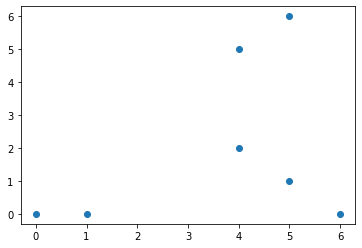

In [11]:
print("Krzywa nad cialem Z{} o rownaniu y^2 = x^3 - x".format(7))
a = -1
b = 0
p = 7
print("a={}, b={}, p={}".format(a,b,p))
points = gen(a,b,p)
print("punkty - {}".format(points))
print()
print("P[0] - grupa dwuelementowa: {}".format([points[0],multiply(2,points[0],a,p)]))
print("Bo 2P[0]=O")
print()
print("P[1] - grupa dwuelementowa: {}".format([points[1],multiply(2,points[1],a,p)]))
print("Bo 2P[1]=O")
print()
print("P[2] - grupa czteroelementowa: {}".format([points[2],multiply(2,points[2],a,p),multiply(3,points[2],a,p),multiply(4,points[2],a,p)]))
print("Bo 2P[2]=P[1], 3P[2]=P[3], 4P[2]=O")
print()
print("P[3] - grupa czteroelementowa: {}".format([points[3],multiply(2,points[3],a,p),multiply(3,points[3],a,p),multiply(4,points[3],a,p)]))
print("Bo 2P[3]=P[1], 3P[3]=P[2], 4P[3]=O")
print()
print("P[4] - grupa czteroelementowa: {}".format([points[4],multiply(2,points[4],a,p),multiply(3,points[4],a,p),multiply(4,points[4],a,p)]))
print("Bo 2P[4]=P[1], 3P[4]=P[5], 4P[4]=O")
print()
print("P[5] - grupa czteroelementowa: {}".format([points[5],multiply(2,points[5],a,p),multiply(3,points[5],a,p),multiply(4,points[5],a,p)]))
print("Bo 2P[5]=P[1], 3P[5]=P[4], 4P[5]=O")
print()
print("P[6] - grupa dwuelementowa: {}".format([points[6],multiply(2,points[6],a,p)]))
print("Bo 2P[6]=O")
plt.scatter([p[0] for p in points], [p[1] for p in points])

Krzywa nad cialem Z5 o rownaniu y^2 = x^3 - x
a=-2, b=1, p=5
punkty - [[0, 1], [0, 4], [1, 0], [2, 0]]

P[0] - grupa czteroelementowa: [[0, 1], [1, 0], [0, 4], [nan, nan]]
Bo 2P[0]=P[2], 3P[0]=P[1], 4P[0]=O

P[1] - grupa czteroelementowa: [[0, 4], [1, 0], [0, 1], [nan, nan]]
Bo 2P[1]=P[2], 3P[1]=P[0], 4P[1]=O

P[2] - grupa dwuelementowa: [[1, 0], [nan, nan]]
Bo 2P[2]=O

P[3] - grupa dwuelementowa: [[2, 0], [nan, nan]]
Bo 2P[3]=O


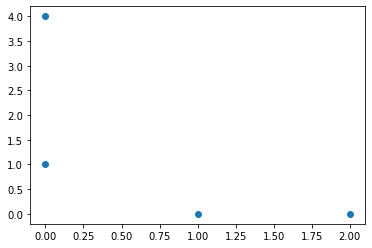

In [12]:
print("Krzywa nad cialem Z{} o rownaniu y^2 = x^3 - x".format(5))
a = -2
b = 1
p = 5
print("a={}, b={}, p={}".format(a,b,p))
points = gen(a,b,p)
print("punkty - {}".format(points))
print()
i=0
print("P[{}] - grupa czteroelementowa: {}".format(i,[points[i],multiply(2,points[i],a,p),multiply(3,points[i],a,p),multiply(4,points[i],a,p)]))
print(f"Bo 2P[{i}]=P[2], 3P[{i}]=P[1], 4P[{i}]=O")
print()
i=1
print("P[{}] - grupa czteroelementowa: {}".format(i,[points[i],multiply(2,points[i],a,p),multiply(3,points[i],a,p),multiply(4,points[i],a,p)]))
print(f"Bo 2P[{i}]=P[2], 3P[{i}]=P[0], 4P[{i}]=O")
print()
i=2
print("P[{}] - grupa dwuelementowa: {}".format(i,[points[i],multiply(2,points[i],a,p)]))
print(f"Bo 2P[{i}]=O")
print()
i=3
print("P[{}] - grupa dwuelementowa: {}".format(i,[points[i],multiply(2,points[i],a,p)]))
print(f"Bo 2P[{i}]=O")
plt.scatter([p[0] for p in points], [p[1] for p in points])

## Zadanie 4 (1 pkt)

Sprawdź numerycznie, korzystając z funkcji $gen()$, twierdzenie Hassego. Sprawdź, że ze wzrostem liczby pierwszej $p$ dla krzywej o parametrach $a=-1$, $b=0$ liczba punktów na krzywej podąża za oszacowaniem $p+1-2\sqrt{p}\leq\#E\leq p+1+2\sqrt{p}$. Narysuj wykres $\#E(p)$ i proste o równaniach $p+1-2\sqrt{p}$ oraz $p+1+2\sqrt{p}$.

Uwaga: Możesz wygenerować liczby pierwsze, np. w zakresie od 0 do 1000, za pomocą:

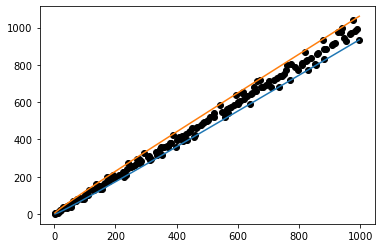

In [32]:
from sympy import primerange
prime_numbers = list(primerange(0,1000))
a = -1
b = 0
points = []
lower_bound = []
upper_bound = []
for p in prime_numbers:
    points.append(len(gen(a,b,p)))
    lower_bound.append(p+1-2*math.sqrt(p))
    upper_bound.append(p+1+2*math.sqrt(p))
    
plt.plot(prime_numbers, lower_bound)
plt.plot(prime_numbers, upper_bound)
plt.scatter(prime_numbers, points, color = 'black')

lub jakkolwiek inaczej.

## Zadanie 5 (2 pkt.)

Napisz funkcję $ord(G,a,p)$ znajdującą rząd punktu $G$ na krzywej o parametrach $a$, $p$ (oznaczenia jak w poprzednich zadaniach). Rząd elementu to $n$ takie, że $nG=\mathcal{O}$. Znajdź punkt na krzywej o parametrach $a=-1$,$b=0$,$p=97$ o największym rzędzie, moze ich być więcej niż jeden, wybierz którykolwiek.

In [82]:
def ord(G,a,p):
    order = 0
    while(True):
        point = multiply(order, G, a, p)
        if np.isnan(point[0]) or np.isnan(point[1]):
            print(point)
            print(order)
            break
        order+=1
    return  order

[nan, nan]
20
20


In [53]:
print(ord([4,4],-1,11)==3)
print(ord([8,8],-1,11)==6)
print(ord([3,2],-1,7)==3)
print(ord([3,5],-1,7)==3)
print(ord([3,2],0,5)==3)
print(ord([0,0],0,5)==2)

True
True
True
True
True
True


In [55]:
a=-1
b=0
p=97
points = gen(a,b,p)
max_ord = 0
for point in points:
    curr_ord = ord(point,a,p)
    if(curr_ord>=max_ord):
        max_ord=curr_ord
        result = point
        
print("point: {}, order: {}".format(result,max_ord))

point: [91, 88], order: 20


## Zadanie 6 (1 pkt)

Prześledź działanie protokołu Diffiego-Helmana, jednak tym razem opertego o krzywe eliptyczne, i uzupełnij poszczególne kroki.

Alicja i Bob ustalają publicznie krzywą eliptyczą (czyli parametry $a$,$b$,$p$) w której będą działać oraz punkt na tej krzywej $G$. Weź krzywą z poprzedniego zadania oraz znaleziony w nim punkt.

In [56]:
a = -1
b = 0
G = [91,88]
p = 97

Alicja wybiera losową liczbę naturalną $n$ z przedziału $[2,\#E-1]$, $\#E$ to liczba punktów na krzywej:

In [85]:
E=len(gen(a,b,p))
n = random.randint(2,E-1)
print(n)

43


Następnie oblicza $A=nG$ zgodnie z zasadami mnożenia punktów na krzywej przez liczbe naturalną:

In [87]:
A=multiply(n,G,a,p)
print(A)

[27, 16]


To samo robi Bob, wybiera losową liczbę naturalną $m$ i oblicza $B=mG$:

In [89]:
m=random.randint(2,E-1)
B=multiply(m,G,a,p)
print(m)
print(B)

2
[65, 70]


Liczby $n$ i $m$ są znane tylko, odpowiednio, Alicji i Bobowi, natomiast $A$ oraz $B$ są wymieniane publicznym kanałem. Bob otrzymuje $A$ i wykonuje operację $k_B=mA$, z kolei Alicja otrzymuje $B$ i wykonuje operację $k_A=nB$:

In [90]:
k_B=multiply(m,A,a,p)
k_A=multiply(n,B,a,p)

In [91]:
k_A==k_B

True

Zawuażmy, że $k_A=k_B$, wynika to z tego, że $k_A=nB=nmG$ oraz $k_B=mA=mnG$ a oczywiście $nm=mn$. Zatem Alicja i Bob dysponują tą samą liczbą, którą mogą użyć jako klucz do szyfrowania. Publicznie znane są wartości $a$, $b$, $p$, $G$, $nG$ oraz $mG$, jednak odzyskanie z nich $n$ i $m$ jest bardzo trudne przy odpwiednim doborze krzywej i punktu na niej.